# Data Science Assignment: eCommerce Transactions Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
customers_df = pd.read_csv('Customers (1).csv')
products_df = pd.read_csv('Products (1).csv')
transactions_df = pd.read_csv('Transactions.csv')

In [6]:
print(customers_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [7]:
print(products_df.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [8]:
print(transactions_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [9]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [10]:
# Merging datasets for EDA
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [11]:
print("Customers Overview:\n", customers_df.describe(include='all'))

Customers Overview:
        CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00


In [12]:
print("Products Overview:\n", products_df.describe(include='all'))

Products Overview:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [13]:
print("Transactions Overview:\n", transactions_df.describe(include='all'))

Transactions Overview:
        TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              NaN        NaN       NaN     2024-06-26 17:21:52.500000   
75%              NaN        NaN       NaN            2024-09-19 14:19:57   
max              NaN        NaN       NaN            2024-12-28 11:00:00   
std              NaN        NaN       NaN                            NaN   

           Quantity   TotalValue       Price  
count   1000.000

C:\Users\User\AppData\Local\Temp\ipykernel_10168\914089513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', palette='Set2')


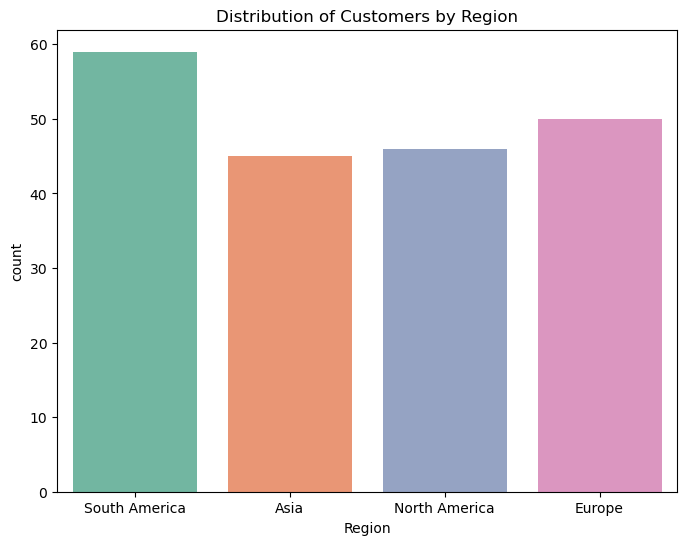

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Region', palette='Set2')
plt.title('Distribution of Customers by Region')
plt.show()

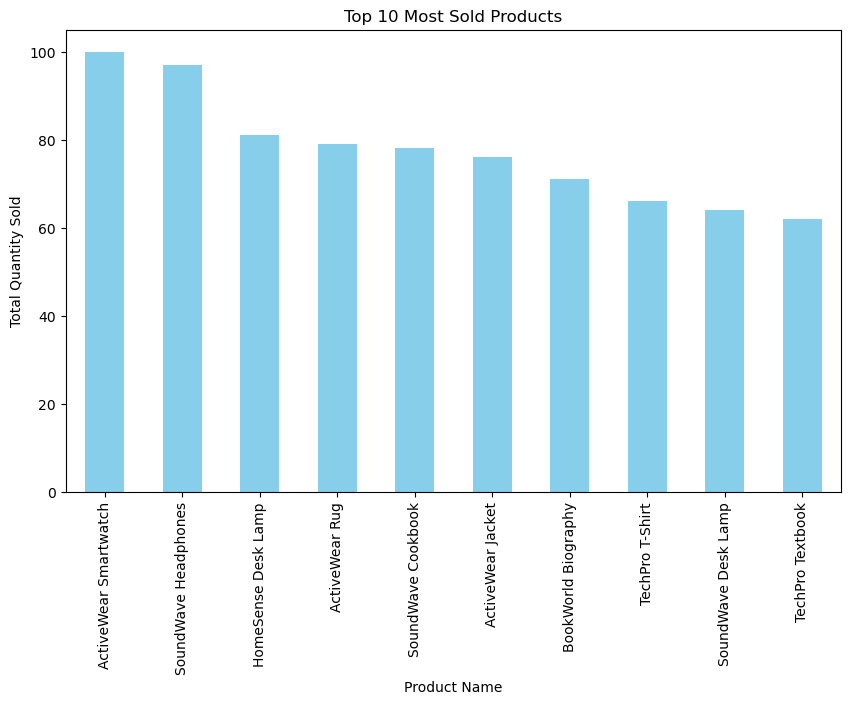

In [15]:
# Top 10 most sold products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

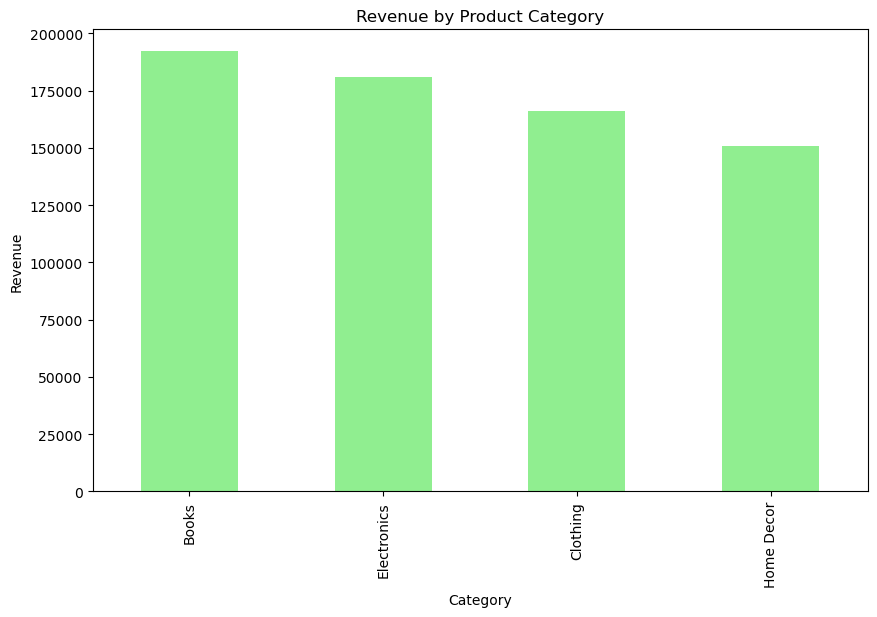

In [16]:
# Revenue by product category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', figsize=(10, 6), color='lightgreen', title='Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

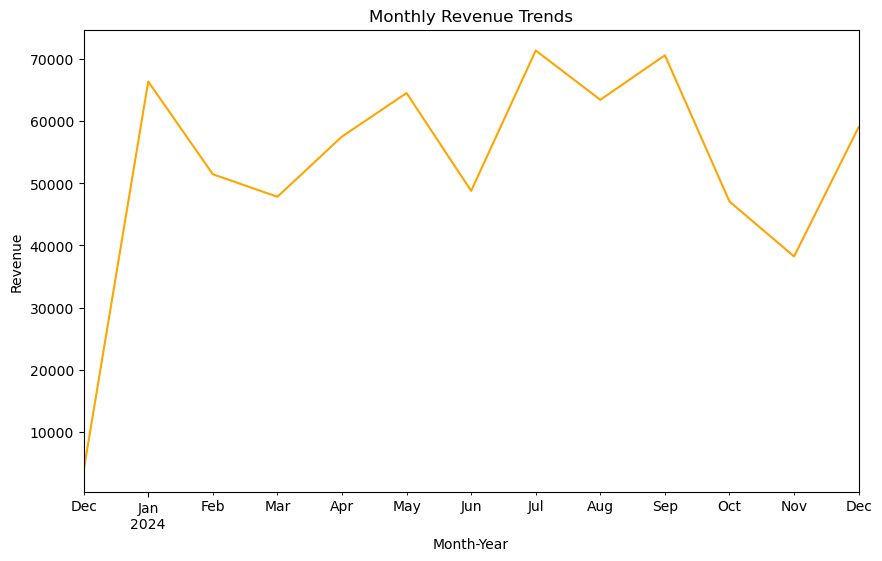

In [17]:
# Monthly transaction trends
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_trends = merged_df.groupby('MonthYear')['TotalValue'].sum()
monthly_trends.plot(figsize=(10, 6), color='orange', title='Monthly Revenue Trends')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.show()

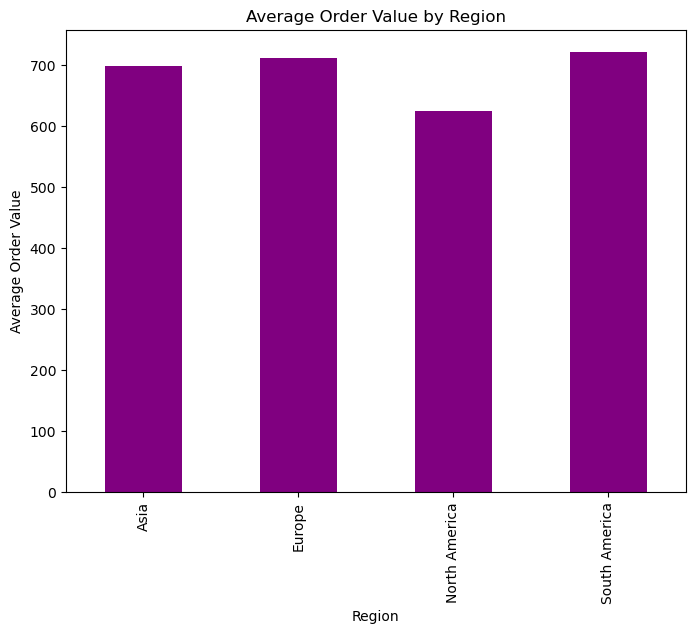

In [18]:
# Average order value by region
avg_order_value = merged_df.groupby('Region')['TotalValue'].mean()
avg_order_value.plot(kind='bar', figsize=(8, 6), color='purple', title='Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value')
plt.show()

In [21]:
# Save the merged dataset for further tasks
merged_df.to_csv('Merged_Data.csv', index=False)